#### 환율

In [153]:
def exchange_money(nation = None, df = df_train, name=None):
  nation['날짜'] = nation['날짜'].str.replace('년 ','-')
  nation['날짜'] = nation['날짜'].str.replace('월 ','-')
  nation['날짜'] = nation['날짜'].str.replace('일','')

  nation['날짜'] = nation['날짜'].astype('datetime64')

  nation = nation.query('날짜.dt.dayofweek == 0')
  nation = nation[nation['날짜']<='2019-12-30']
  nation = nation[['날짜','종가']]

  nation = nation.sort_index(ascending=True)
  is_nan = nation.isna().sum()

  if len(nation['날짜'].unique()) != len(df['기준일'].unique()):
    diff = len(df.query('기준일.dt.dayofweek == 0')['기준일'].unique()) - len(nation['날짜'].unique())
    print('{}은 {}개의 결측치 존재'.format(name, diff))

  return nation

- 베트남 환율(2015~2019년 베트남 환율)

In [154]:
vietnam = pd.read_csv('/content/drive/MyDrive/빅콘/Seafood_Import_Price_Prediction/DATA/raw_exchange_vietnam.csv',usecols=['날짜','종가']) 
vietnam = exchange_money(nation = vietnam,name ='vietnam')

vietnam

,날짜,종가
378,2019-12-30,0.000043
383,2019-12-23,0.000043
388,2019-12-16,0.000043
393,2019-12-09,0.000043
398,2019-12-02,0.000043
...,...,...
1403,2016-01-25,0.000045
1408,2016-01-18,0.000045
1413,2016-01-11,0.000045
1418,2016-01-04,0.000044


- 태국( 2015~2019년 태국 환율 )

In [156]:
thai = pd.read_csv('/content/drive/MyDrive/빅콘/Seafood_Import_Price_Prediction/DATA/raw_exchange_thai.csv',encoding='utf-8') 
thai = exchange_money(thai, name ='thai')

thai

,날짜,종가
0,2015-12-28,0.0277
1,2016-01-04,0.0277
2,2016-01-11,0.0276
3,2016-01-18,0.0275
4,2016-01-25,0.0278
...,...,...
205,2019-12-02,0.0330
206,2019-12-09,0.0330
207,2019-12-16,0.0331
208,2019-12-23,0.0331


- 페루 환율(2015~2019년 페루 환율)

In [157]:
peru = pd.read_csv('/content/drive/MyDrive/빅콘/Seafood_Import_Price_Prediction/DATA/raw_exchange_peru.csv',encoding='utf-8') 
peru = exchange_money(peru, name = 'peru')

peru

,날짜,종가
0,2015-12-28,0.2943
1,2016-01-04,0.2930
2,2016-01-11,0.2916
3,2016-01-18,0.2913
4,2016-01-25,0.2887
...,...,...
205,2019-12-02,0.2948
206,2019-12-09,0.2961
207,2019-12-16,0.2981
208,2019-12-23,0.3010


- 노르웨이 환율(2015 ~ 2019년 노르웨이 환율)

In [158]:
norway = pd.read_csv('/content/drive/MyDrive/빅콘/Seafood_Import_Price_Prediction/DATA/raw_exchange_norway.csv',encoding='utf-8') 
norway = exchange_money(norway, name = 'norway')

norway

,날짜,종가
0,2015-12-28,0.1149
1,2016-01-04,0.1126
2,2016-01-11,0.1119
3,2016-01-18,0.1124
4,2016-01-25,0.1142
...,...,...
205,2019-12-02,0.1091
206,2019-12-09,0.1093
207,2019-12-16,0.1110
208,2019-12-23,0.1116


- 중국 환율(2015~2019년 중국 환율)

In [159]:
china = pd.read_csv('/content/drive/MyDrive/빅콘/Seafood_Import_Price_Prediction/DATA/raw_exchange_china.csv',encoding='utf-8')
china = exchange_money(china, name = 'china') 

china

,날짜,종가
0,2015-12-28,0.1541
1,2016-01-04,0.1530
2,2016-01-11,0.1522
3,2016-01-18,0.1520
4,2016-01-25,0.1520
...,...,...
205,2019-12-02,0.1420
206,2019-12-09,0.1421
207,2019-12-16,0.1430
208,2019-12-23,0.1426


- 2015~2019년 칠레 환율

In [160]:
chile = pd.read_csv('/content/drive/MyDrive/빅콘/Seafood_Import_Price_Prediction/DATA/raw_exchange_chile.csv',encoding='utf-8') 
chile = exchange_money(chile, name = 'chile')

chile

,날짜,종가
0,2015-12-28,0.001400
1,2016-01-04,0.001400
2,2016-01-11,0.001400
3,2016-01-18,0.001400
4,2016-01-25,0.001400
...,...,...
205,2019-12-02,0.001244
206,2019-12-09,0.001293
207,2019-12-16,0.001312
208,2019-12-23,0.001327


#### 환율과 평균단가간 상관관계

##### Preprocessing

In [173]:
# 환율과 평균단가간 상관관계를 알아보기 위해 환율 날짜 기준으로 평균단가 기준일 전처리 

all_squid_price_new = pd.DataFrame({'기준일':all_squid_price.index,
              '평균단가($)':all_squid_price.values}).query('기준일.dt.dayofweek == 0') # 2015-12-28~2019-12-30까지 일주일 간격 오징어 평균단가

all_salmon_price_new = pd.DataFrame({'기준일':all_salmon_price.index,
              '평균단가($)':all_salmon_price.values}).query('기준일.dt.dayofweek == 0') # 2015-12-28~2019-12-30까지 일주일 간격 오징어 평균단가

all_Whiteleg_shrimp_price_new = pd.DataFrame({'기준일':all_Whiteleg_shrimp_price.index,
              '평균단가($)':all_Whiteleg_shrimp_price.values}).query('기준일.dt.dayofweek == 0') # 2015-12-28~2019-12-30까지 일주일 간격 오징어 평균단가


In [174]:
'''
기준일 결측값들

전주와 다음주 평균단가 평균 or 월 평균단가 평균으로 결측값 대치
'''
total = pd.date_range('2015-12-28','2019-12-30',freq='7D')

total # 2015-12-28 부터 2019-12-30까지 일주일 간격의 기간

# set(total) - set(all_squid_price_new['기준일'])
# set(total) - set(all_salmon_price_new['기준일'])
set(total) - set(all_Whiteleg_shrimp_price_new['기준일'])

{Timestamp('2017-01-02 00:00:00', freq='7D'),
 Timestamp('2017-01-09 00:00:00', freq='7D')}

In [175]:
all_squid_price_new['기준일'] = all_squid_price_new['기준일'].astype('string')

squid_price_mean_1602 = (all_squid_price_new[all_squid_price_new['기준일']=='2016-02-01']['평균단가($)'].values+all_squid_price_new[all_squid_price_new['기준일']=='2016-02-15']['평균단가($)'].values)/2 # 전주,다음주 평균단가의 평균
squid_price_mean_1701 = all_squid_price_new[all_squid_price_new['기준일'].str.contains('2017-01')]['평균단가($)'].mean() # 2017년 1월의 평균단가의 평균
squid_price_mean_1710 = (all_squid_price_new[all_squid_price_new['기준일']=='2017-09-25']['평균단가($)'].values+all_squid_price_new[all_squid_price_new['기준일']=='2017-10-09']['평균단가($)'].values)/2 # 전주,다음주 평균단가의 평균

all_squid_price_new['기준일'] = all_squid_price_new['기준일'].astype('datetime64')


In [176]:
all_squid_price_new = all_squid_price_new.append({'기준일':'2016-02-08','평균단가($)':squid_price_mean_1602[0]},ignore_index=True)
all_squid_price_new = all_squid_price_new.append({'기준일':'2017-01-02','평균단가($)':squid_price_mean_1701},ignore_index=True)
all_squid_price_new = all_squid_price_new.append({'기준일':'2017-01-09','평균단가($)':squid_price_mean_1701},ignore_index=True)
all_squid_price_new = all_squid_price_new.append({'기준일':'2017-10-02','평균단가($)':squid_price_mean_1710[0]},ignore_index=True)

all_squid_price_new['기준일'] = all_squid_price_new['기준일'].astype('datetime64')
all_squid_price_new = all_squid_price_new.sort_values('기준일')

all_squid_price_new

,기준일,평균단가($)
0,2015-12-28,1.741647
1,2016-01-04,1.787152
2,2016-01-11,1.345855
3,2016-01-18,1.675178
4,2016-01-25,2.185579
...,...,...
201,2019-12-02,2.439093
202,2019-12-09,2.886105
203,2019-12-16,2.770290
204,2019-12-23,4.016096


In [177]:
all_salmon_price_new['기준일'] = all_salmon_price_new['기준일'].astype('string')

salmon_price_mean_1701 = all_salmon_price_new[all_salmon_price_new['기준일'].str.contains('2017-01')]['평균단가($)'].mean() # 2017년 1월의 평균단가의 평균

all_salmon_price_new['기준일'] = all_salmon_price_new['기준일'].astype('datetime64')


In [178]:
all_salmon_price_new = all_salmon_price_new.append({'기준일':'2017-01-02','평균단가($)':salmon_price_mean_1701},ignore_index=True)
all_salmon_price_new = all_salmon_price_new.append({'기준일':'2017-01-09','평균단가($)':salmon_price_mean_1701},ignore_index=True)

all_salmon_price_new['기준일'] = all_salmon_price_new['기준일'].astype('datetime64')
all_salmon_price_new = all_salmon_price_new.sort_values('기준일')

all_salmon_price_new

,기준일,평균단가($)
0,2015-12-28,13.287212
1,2016-01-04,12.331994
2,2016-01-11,12.876513
3,2016-01-18,13.387350
4,2016-01-25,12.644323
...,...,...
203,2019-12-02,14.114510
204,2019-12-09,15.565930
205,2019-12-16,16.314381
206,2019-12-23,15.883609


In [179]:
all_Whiteleg_shrimp_price_new['기준일'] = all_Whiteleg_shrimp_price_new['기준일'].astype('string')

Whiteleg_shrimp_price_mean_1701 = all_Whiteleg_shrimp_price_new[all_Whiteleg_shrimp_price_new['기준일'].str.contains('2017-01')]['평균단가($)'].mean() # 2017년 1월의 평균단가의 평균

all_Whiteleg_shrimp_price_new['기준일'] = all_Whiteleg_shrimp_price_new['기준일'].astype('datetime64')


In [180]:
all_Whiteleg_shrimp_price_new = all_Whiteleg_shrimp_price_new.append({'기준일':'2017-01-02','평균단가($)':Whiteleg_shrimp_price_mean_1701},ignore_index=True)
all_Whiteleg_shrimp_price_new = all_Whiteleg_shrimp_price_new.append({'기준일':'2017-01-09','평균단가($)':Whiteleg_shrimp_price_mean_1701},ignore_index=True)

all_Whiteleg_shrimp_price_new['기준일'] = all_Whiteleg_shrimp_price_new['기준일'].astype('datetime64')
all_Whiteleg_shrimp_price_new = all_Whiteleg_shrimp_price_new.sort_values('기준일')

all_Whiteleg_shrimp_price_new

,기준일,평균단가($)
0,2015-12-28,9.922919
1,2016-01-04,9.279109
2,2016-01-11,10.658746
3,2016-01-18,9.308712
4,2016-01-25,9.399535
...,...,...
203,2019-12-02,10.567506
204,2019-12-09,9.523846
205,2019-12-16,9.749197
206,2019-12-23,9.601798


In [181]:
total = pd.date_range('2015-12-28','2019-12-30',freq='7D') # 2015-12-28 부터 2019-12-30까지 일주일 간격의 기간

# set(total) - set(all_squid_price_new['기준일'])
# set(total) - set(all_salmon_price_new['기준일'])
set(total) - set(all_Whiteleg_shrimp_price_new['기준일']) # 결측값 x

set()

##### Corr HeatMap

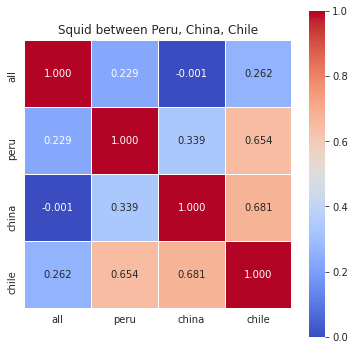

In [182]:
corr = pd.DataFrame({'all':all_squid_price_new['평균단가($)'],
             'peru':peru['종가'],
             'china':china['종가'],
             'chile':chile['종가']}).corr() 

plt.figure(figsize= (6, 6))
plt.title('Squid between Peru, China, Chile')
sns.heatmap(corr, cmap='coolwarm', fmt='.3f', annot=True, 
            linewidths = 0.1, linecolor='white', square = True)

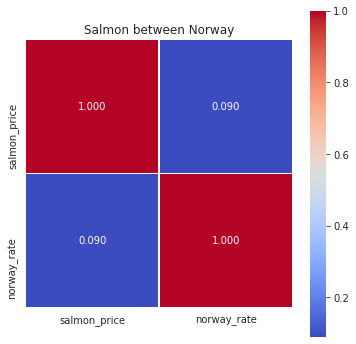

In [183]:
corr = pd.DataFrame({'salmon_price':all_salmon_price_new['평균단가($)'],
             'norway_rate':norway['종가']}).corr()


plt.figure(figsize= (6, 6))
plt.title('Salmon between Norway')
sns.heatmap(corr, cmap='coolwarm', fmt='.3f', 
            annot=True, linewidths = 0.1, linecolor='white', square = True)

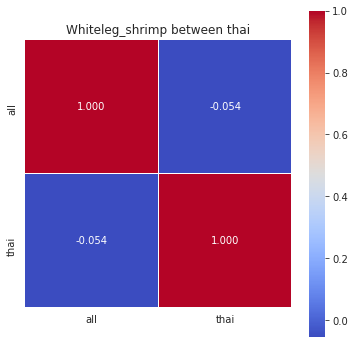

In [184]:
corr = pd.DataFrame({'all':all_Whiteleg_shrimp_price_new['평균단가($)'],
              'thai':thai['종가']
             }).corr()

plt.figure(figsize= (6, 6))
plt.title('Whiteleg_shrimp between thai')
sns.heatmap(corr, cmap='coolwarm', fmt='.3f', annot=True, 
            linewidths = 0.1, linecolor='white', square = True)